In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from  collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance


Define some functions
*   Get annotation

In [ ]:
def get_annot(ax, distance_to_bar = 0.5, decimal=1):
#to get annotation on barplot
#ax : axis to apply 
#distance_to_bar : distance of annot. position to bar
# decimal : number of decimal 
    for p in ax.patches:
        height = round((p.get_height()),decimal) + distance_to_bar
        ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=15)

#Dataset

In [ ]:
uploaded = files.upload()

Saving conversion_data.csv to conversion_data.csv


In [ ]:
df = pd.read_csv('/content/conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
df = df[df.age < 100]
df.shape

(316198, 6)

In [ ]:
df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,316198,316198.000000,316198.000000,316198,316198.000000,316198.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155039,NaN,NaN
mean,NaN,30.569311,0.685469,NaN,4.872918,0.032252
std,NaN,8.268958,0.464329,NaN,3.341053,0.176669
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [ ]:
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

##Visualization

<Figure size 1296x864 with 0 Axes>

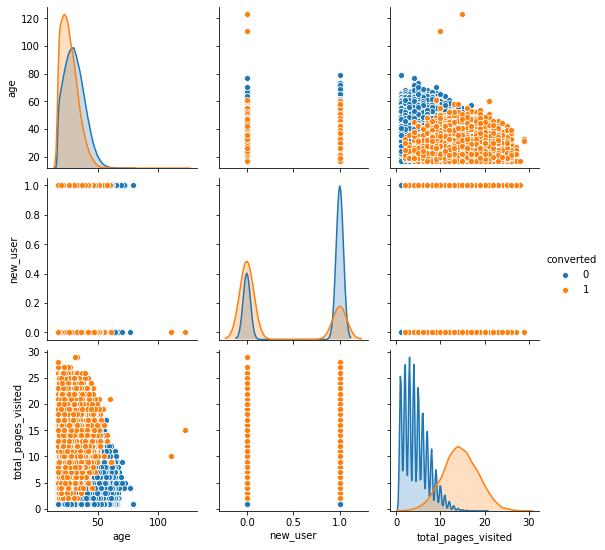

In [ ]:
plt.figure(figsize=(18,12))
sns.pairplot(df, hue='converted')

In [ ]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

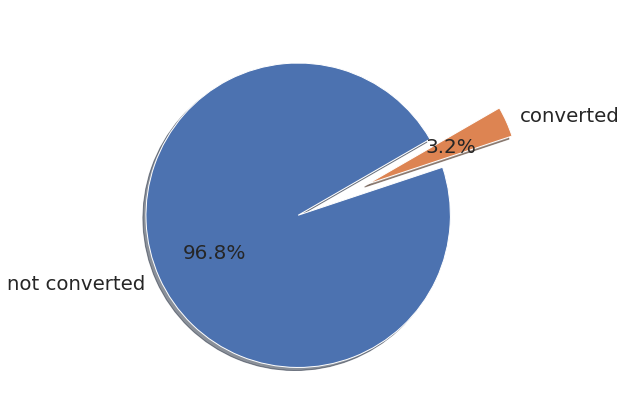

In [ ]:
converted = df['converted'].unique()
converted_dist = df['converted'].value_counts()/df.shape[0]

plt.figure(figsize=(7,7))
plt.pie(x=converted_dist, labels=['not converted', 'converted'], autopct='%1.1f%%', shadow=True, startangle=30, explode=(0.3, 0.2))
plt.rc('font', size=30)

In [ ]:
country_name = df['country'].unique()
country_name

array(['UK', 'US', 'China', 'Germany'], dtype=object)

([<matplotlib.patches.Wedge at 0x7f25b9575898>,
 [Text(-1.1273885722206518, -0.22692511369674334, 'US'),
  Text(1.0535577703534367, -0.46099460357784655, 'China'),
  Text(0.7761168306941554, 0.8486121994841107, 'UK'),
  Text(0.14875690647056533, 1.1403382755907598, 'Germany')],
 [Text(-0.6372196277768902, -0.12826202078511578, '56.3%'),
  Text(0.5954891745475944, -0.26056216723965236, '24.2%'),
  Text(0.43867473039234867, 0.47965037362145385, '15.3%'),
  Text(0.0840799906137978, 0.6445390253339076, '4.1%')])

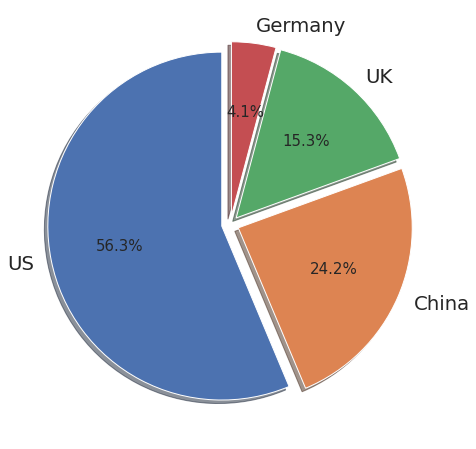

In [ ]:
plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 15})
plt.pie(x=dist_country, explode=(0.05, 0.05, 0.05, 0.05), labels=['US', 'China', 'UK', 'Germany'], shadow=True, startangle=90, autopct='%1.1f%%')

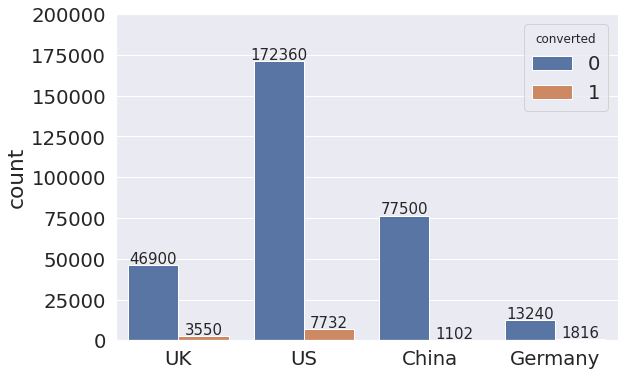

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x='country', hue='converted', data=df)
get_annot(ax=ax, distance_to_bar=1000, decimal=0)

plt.ylim([0, 200000])
plt.xlabel('')
plt.rcParams.update({'font.size': 12})

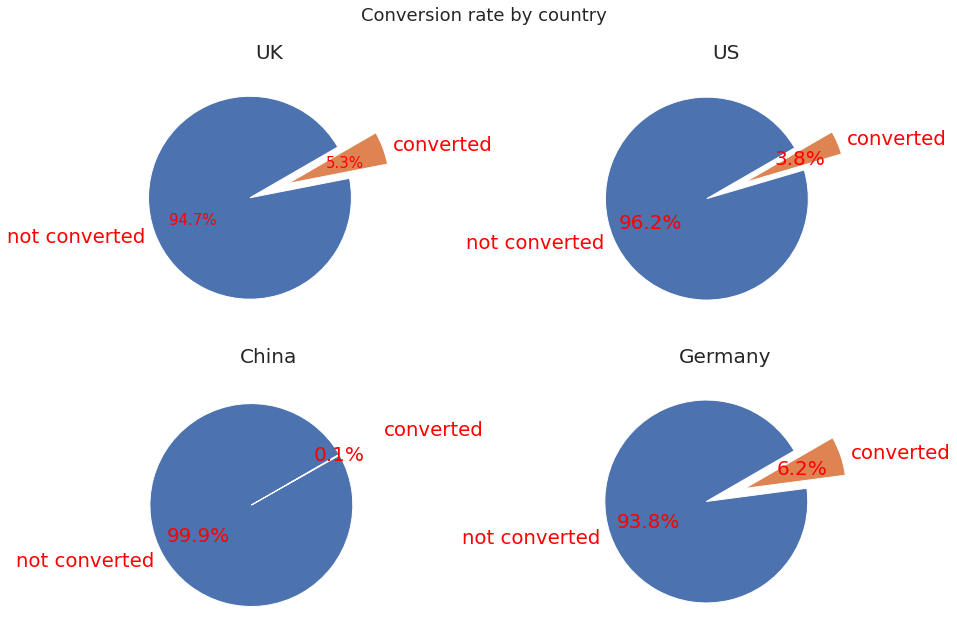

In [ ]:
num = len(df.country.unique())
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))

i = 0
j = 0
n = 0

for country in df.country.unique():
    n = n + 1
    df_country = df[df.country==country]['converted'].value_counts()/df[df.country==country].shape[0]

    plt.subplot(str(rows)+str(2)+str(n))
    plt.pie(df_country, labels=['not converted', 'converted'], autopct='%1.1f%%', startangle=30, explode=(0.2, 0.2), textprops={'color':"red"})
    plt.title(country, fontsize=20)
    plt.rc('font', size=20)
    j = (j + 1)%2
    i = i + 1 -j

plt.subplots_adjust(top=0.9)
fig.suptitle('Conversion rate by country', fontsize=18)
plt.show()

In [ ]:
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [ ]:
country = df['country'].unique()
dist_country = df['country'].value_counts()/df.shape[0]
print(dist_country)

US         0.563226
China      0.242258
UK         0.153226
Germany    0.041290
Name: country, dtype: float64


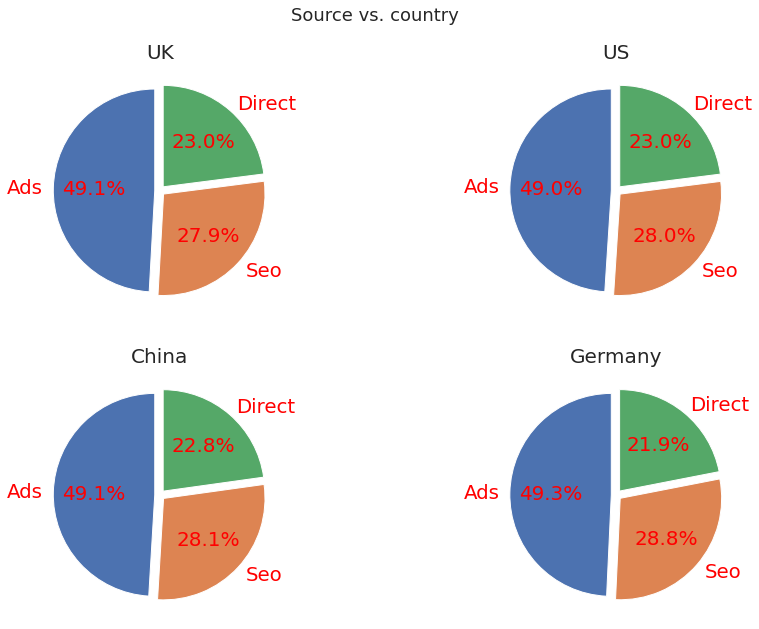

In [ ]:
num = len(df.country.unique())
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))

i = 0
j = 0
n = 0

for country in df.country.unique():
    n = n + 1
    df_country = df[df.country==country]['source'].value_counts()/df[df.country==country].shape[0]

    plt.subplot(str(rows)+str(2)+str(n))
    plt.pie(df_country, labels=df.source.unique(), autopct='%1.1f%%', startangle=90, explode=(0.05, 0.05, 0.05), textprops={'color':"red"})
    plt.title(country, fontsize=20)
    plt.rc('font', size=20)
    j = (j + 1)%2
    i = i + 1 -j

plt.subplots_adjust(top=0.9)
fig.suptitle('Source vs. country', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Converted vs. Source')

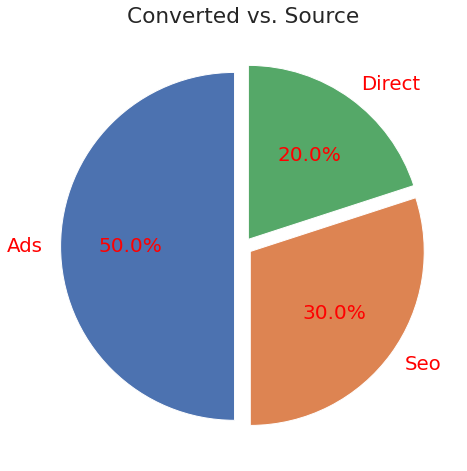

In [ ]:
df_country = df[df.converted==1]['source'].value_counts()/df[df.converted==1].shape[0]

plt.figure(figsize=(8,8))
plt.pie(df_country, labels=df.source.unique(), autopct='%1.1f%%', startangle=90, explode=(0.05, 0.05, 0.05), textprops={'color':"red"})
plt.title('Converted vs. Source')

Text(0.5, 1.0, 'Not converted vs. Source')

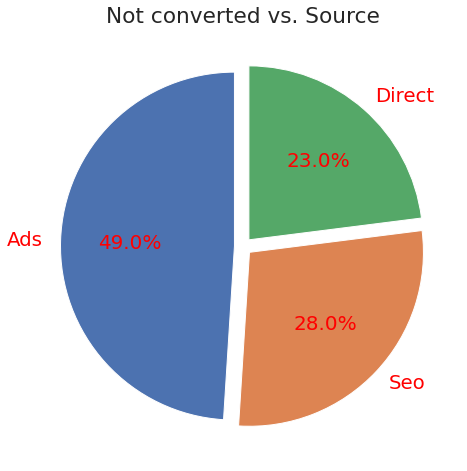

In [ ]:
df_country = df[df.converted==0]['source'].value_counts()/df[df.converted==0].shape[0]

plt.figure(figsize=(8,8))
plt.pie(df_country, labels=df.source.unique(), autopct='%1.1f%%', startangle=90, explode=(0.05, 0.05, 0.05), textprops={'color':"red"})
plt.title('Not converted vs. Source')

Text(0.5, 1.0, 'Page visited vs. Age')

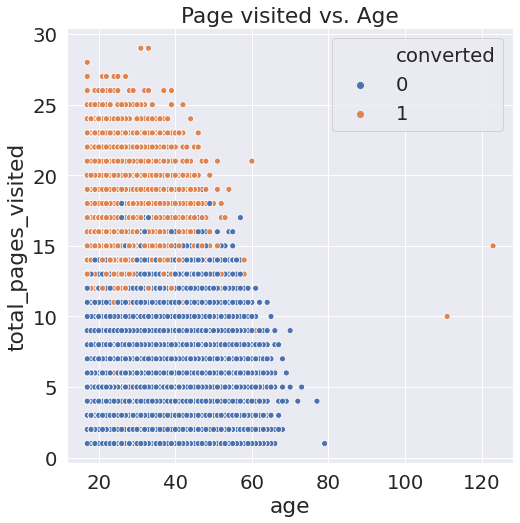

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='age', y='total_pages_visited', hue='converted', data=df)
plt.title('Page visited vs. Age')

(0.0, 250000.0)

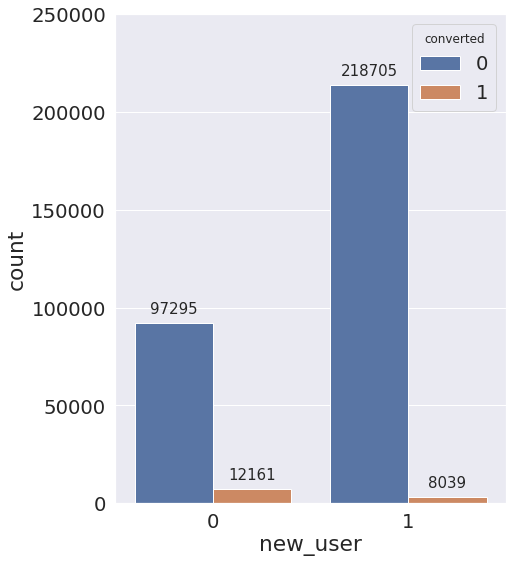

In [ ]:
plt.figure(figsize=(7,9))
ax = sns.countplot(x='new_user', hue='converted', data=df)
get_annot(ax=ax, distance_to_bar=5000, decimal=0)
plt.ylim([0, 250000])

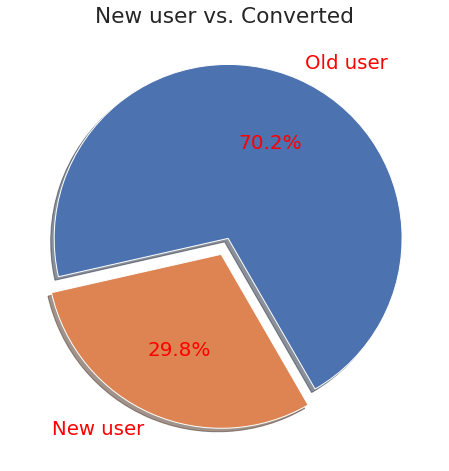

In [ ]:
df_country = df[df.converted==1]['new_user'].value_counts()/df[df.converted==1].shape[0]

plt.figure(figsize=(8,8))
plt.pie(df_country, labels=['Old user', 'New user'], autopct='%1.1f%%', startangle=-60, explode=(0.05, 0.05), textprops={'color':"red"}, shadow=True)
plt.title('New user vs. Converted')
plt.rc('font', size=20)

In [ ]:
# AGE - NOT converted
df[df.converted==0]['age'].describe()

count    306000.000000
mean         30.703961
std           8.275779
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

In [ ]:
# AGE - Converted
df[df.converted==1]['age'].describe()

count    10200.000000
mean        26.546765
std          7.051849
min         17.000000
25%         21.000000
50%         25.000000
75%         31.000000
max        123.000000
Name: age, dtype: float64

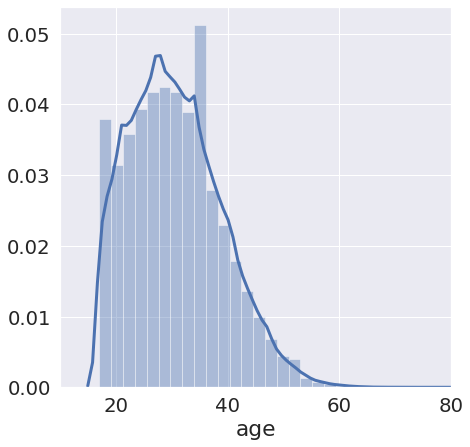

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['age'], kde_kws=dict(linewidth=3))
plt.xlim([10, 80])
plt.rc('font', size=15)

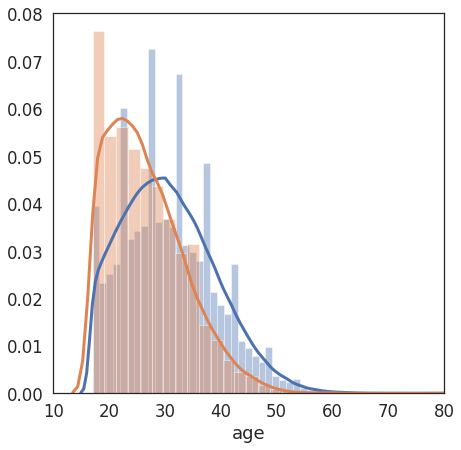

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style(style='white')
sns.distplot(df[df.converted==0]['age'], kde_kws=dict(linewidth=3), label='Converted')
sns.distplot(df[df.converted==1]['age'], kde_kws=dict(linewidth=3), label='Not converted')
plt.xlim([10, 80])
plt.rc('font', size=15)

(10.0, 80.0)

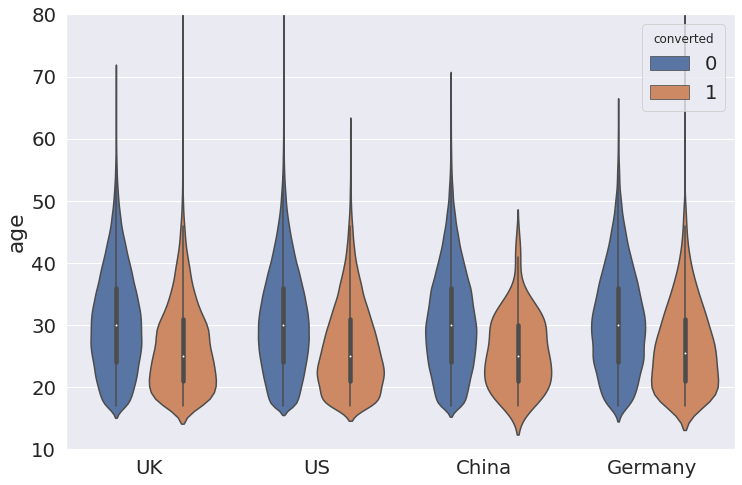

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(y='age', x='country', hue='converted', data=df)
plt.xlabel('')
plt.ylim([10, 80])

Text(0.5, 0, '')

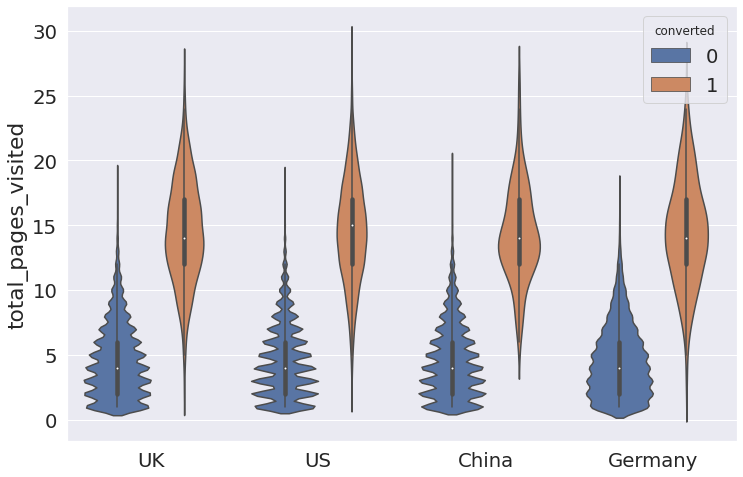

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(y='total_pages_visited', x='country', hue='converted', data=df)
plt.xlabel('')

Text(0.5, 0, '')

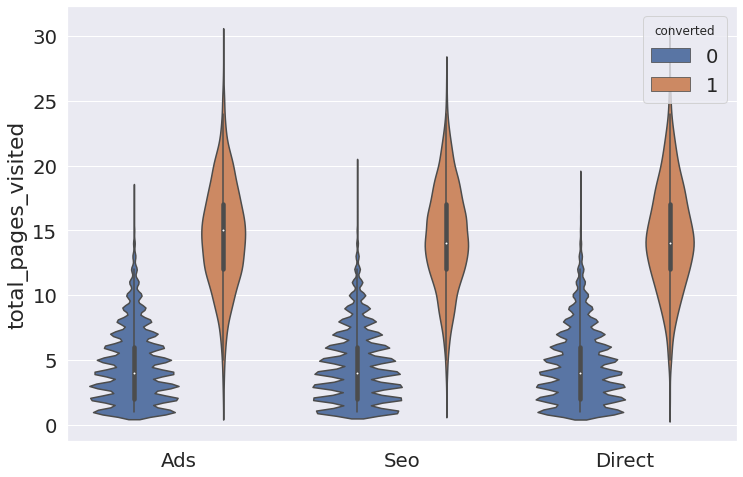

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(y='total_pages_visited', x='source', hue='converted', data=df)
plt.xlabel('')

In [ ]:
df['total_pages_visited'].value_counts()

2     43868
3     43829
4     41046
1     40739
5     36308
6     30261
7     23488
8     17522
9     12157
10     8074
11     5394
12     3615
13     2425
14     1811
15     1325
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
29        2
28        1
Name: total_pages_visited, dtype: int64

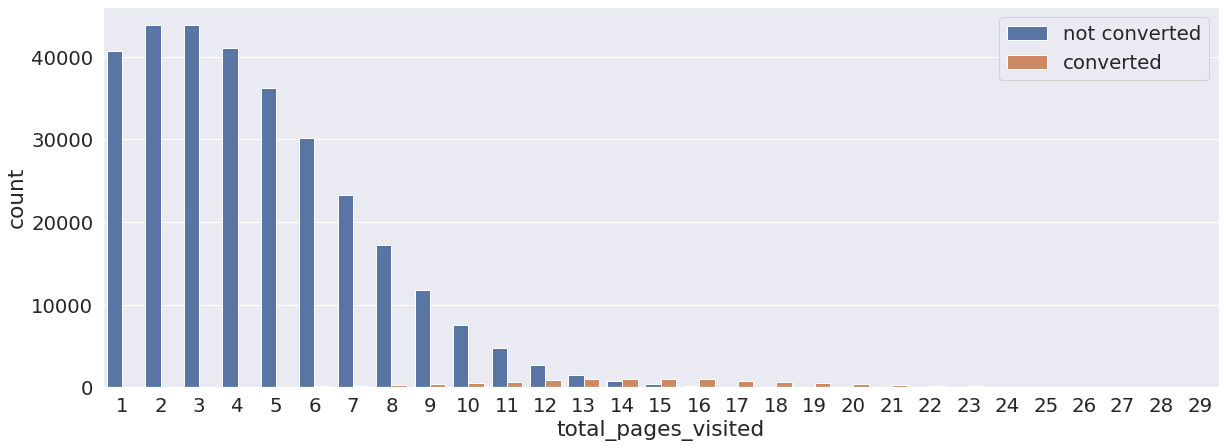

In [ ]:
plt.figure(figsize=(20,7))
sns.set_style(style='white')
ax = sns.countplot(x='total_pages_visited', hue='converted', data=df)
ax.legend(labels=['not converted', 'converted'], bbox_to_anchor=(1,1), loc="upper right")

#plt.rc('font', size=15)

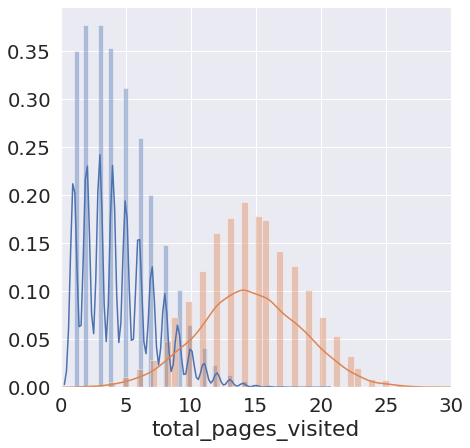

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style(style='white')
sns.distplot(df[df.converted==0]['total_pages_visited'])
sns.distplot(df[df.converted==1]['total_pages_visited'])
plt.xlim([0, 30])
plt.rc('font', size=15)

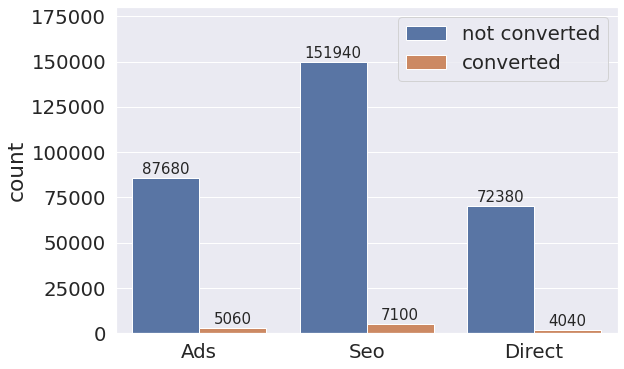

In [ ]:
plt.figure(figsize=(9,6))
ax = sns.countplot(x='source', hue='converted', data=df)
get_annot(ax=ax, distance_to_bar=2000, decimal=0)
plt.legend(['not converted', 'converted'])
plt.ylim([0, 180000])
plt.xlabel('')
plt.rcParams.update({'font.size': 12})

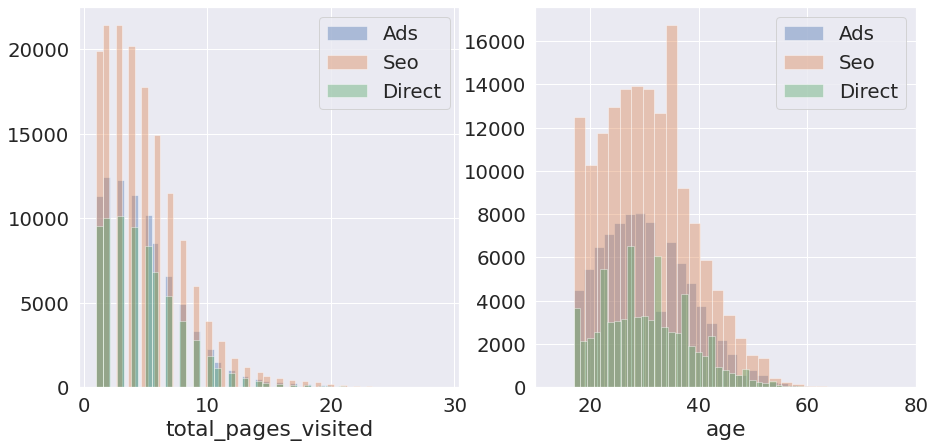

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.distplot(df[df.source=='Ads']['total_pages_visited'], kde=False)
sns.distplot(df[df.source=='Seo']['total_pages_visited'], kde=False)
sns.distplot(df[df.source=='Direct']['total_pages_visited'], kde=False)
plt.legend(df['source'].unique())
plt.rc('font', size=15)

plt.subplot(122)
sns.distplot(df[df.source=='Ads']['age'], kde=False)
sns.distplot(df[df.source=='Seo']['age'], kde=False)
sns.distplot(df[df.source=='Direct']['age'], kde=False)
plt.xlim([10, 80])
plt.legend(df['source'].unique())

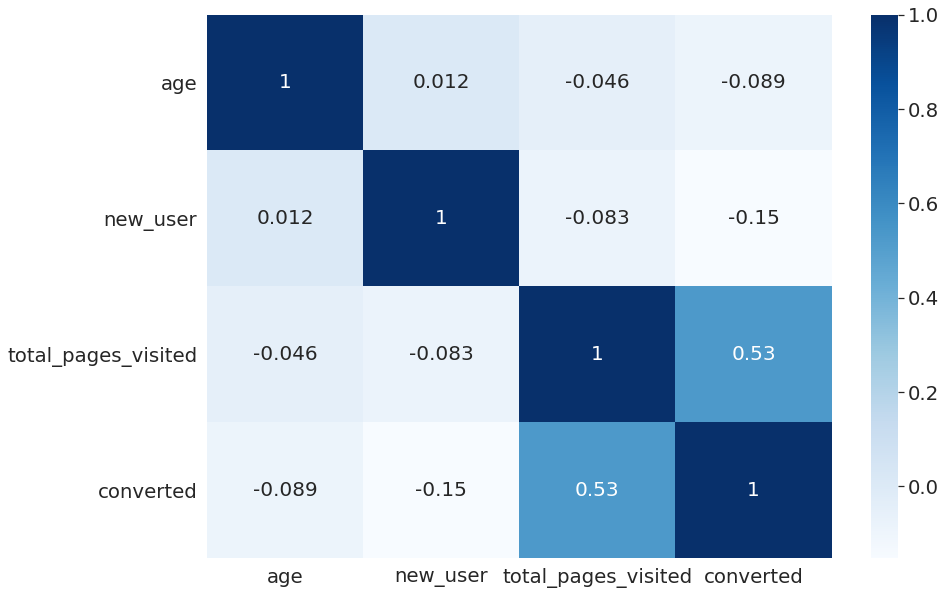

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
sns.set(font_scale=1.8) 
plt.rcParams.update({'font.size': 20})

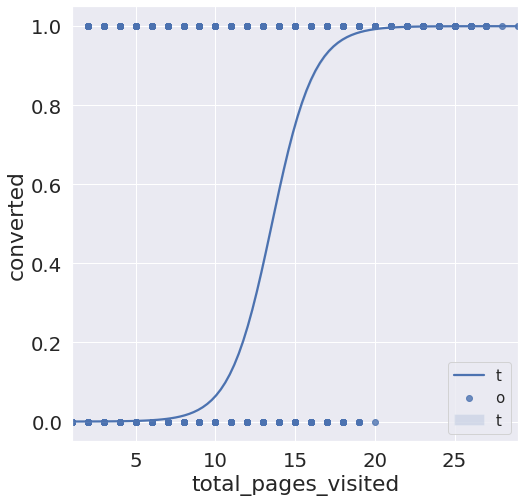

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_pages_visited', y='converted', data=df, logistic=True)
#plt.legend('total_pages_visited', fontsize=15)


Text(0.5, 1.0, 'Logistic analysis : age vs. conversion ')

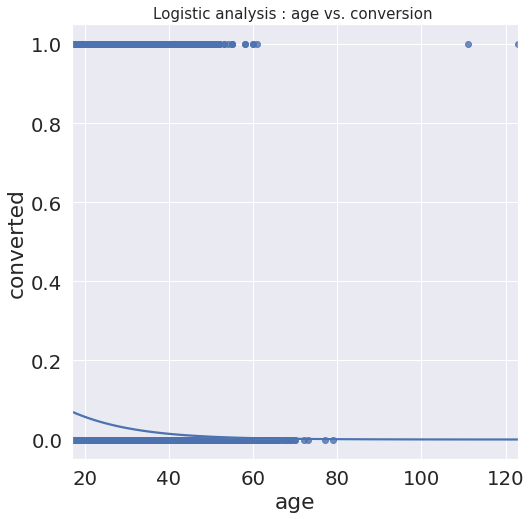

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(x='age', y='converted', data=df, logistic=True)
plt.title('Logistic analysis : age vs. conversion ', fontsize=15)

In [ ]:
#seo : search engine optimization

source = df['source'].unique()
source_dist = df['source'].value_counts()/df.shape[0]
source_dist

NameError: ignored

#Classification models
* LogisticRegression
* DecisionTree
* RandomForest
* XGBoost

In [ ]:
# 	country	age	new_user	source	total_pages_visited	converted

In [ ]:
categorical_feats = ['country', 'new_user', 'source']
numeric_feats = ['age', 'total_pages_visited']

X = df[ numeric_feats + categorical_feats]
y = df['converted']

In [ ]:
X.head()

,age,total_pages_visited,country,new_user,source
0,25,1,UK,1,Ads
1,23,5,US,1,Seo
2,28,4,US,1,Seo
3,39,5,China,1,Seo
4,30,6,US,1,Seo


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Classes - total elements in TRAIN set: ', Counter(y_train))
print('Classes - total elements in TEST set: ', Counter(y_test))

Classes - total elements in TRAIN set:  Counter({0: 244800, 1: 8158})
Classes - total elements in TEST set:  Counter({0: 61200, 1: 2040})


In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
                    ("scaler", StandardScaler(), numeric_feats),
                    ("onehot", OneHotEncoder(), categorical_feats)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.189703,2.433556,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,-0.915637,-0.861021,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.189703,-0.262007,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.520582,-0.861021,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.278604,-1.160527,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
models = [LogisticRegression(class_weight='balanced'), 
          RandomForestClassifier(class_weight='balanced', n_jobs=-1),
          GradientBoostingClassifier()]

model_names =['logistic_regression', 
              'random_forest', 
              'GBoost']

params_grid = [{'C': [0.1, 0.5, 1]},
               {'n_estimators' : [50, 100]},
               {'learning_rate': [0.05, 0.5]}]

kfold = 5 #nb. of folds
Kstrastified = StratifiedKFold(n_splits=kfold)

sample_weight = y_train.shape[0]/(2*np.bincount(y_train))
#sample_weight

In [ ]:
roc_keys = []
roc_values = []
best_estimator = []
precision_recall_keys = []
precision_recall_values = []

for index, (name, model, params) in enumerate(zip(model_names,models,params_grid)):
    #print(index)
    print(name)
    grid = GridSearchCV(model, param_grid=params, cv = Kstrastified)
    if name == 'GBoost':
        grid.fit(X_train, y_train, sample_weight=sample_weight[pd.DataFrame(y_train).values])
    else:
        grid.fit(X_train, y_train)

    y_pred = pd.DataFrame(grid.predict(X_test))
    y_pred_proba = pd.DataFrame(grid.predict_proba(X_test))
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba.loc[:,1])
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba.loc[:,1])

    print(classification_report(y_true=y_test, y_pred=y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

    #Save results
    best_estimator.append(grid.best_estimator_)
    roc_keys.append(name)
    roc_values.append((fpr, tpr))
    precision_recall_keys.append(name)
    precision_recall_values.append((precision, recall))

roc_models = dict(zip(roc_keys, roc_values))
precision_recall_models = dict(zip(precision_recall_keys, precision_recall_values))


logistic_regression
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     61200
           1       0.35      0.93      0.51      2040

    accuracy                           0.94     63240
   macro avg       0.67      0.94      0.74     63240
weighted avg       0.98      0.94      0.95     63240

[[57640  3560]
 [  143  1897]]

random_forest
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     61200
           1       0.41      0.83      0.55      2040

    accuracy                           0.96     63240
   macro avg       0.70      0.89      0.76     63240
weighted avg       0.98      0.96      0.96     63240

[[58814  2386]
 [  350  1690]]

GBoost


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1448: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1448: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1448: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1448: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     61200
           1       0.34      0.93      0.50      2040

    accuracy                           0.94     63240
   macro avg       0.67      0.93      0.73     63240
weighted avg       0.98      0.94      0.95     63240

[[57530  3670]
 [  143  1897]]



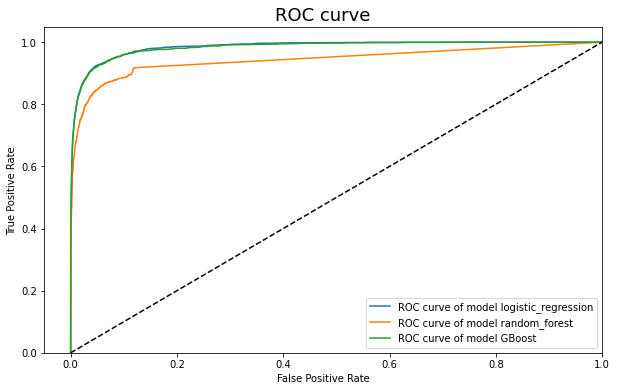

In [ ]:
plt.figure(figsize=(10,6))
for key, roc in roc_models.items():
    plt.plot(roc[0], roc[1],
             label='ROC curve of model {}'.format(str(key)))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title( 'ROC curve', fontsize=18)
plt.rc('font', size=15)
plt.show()


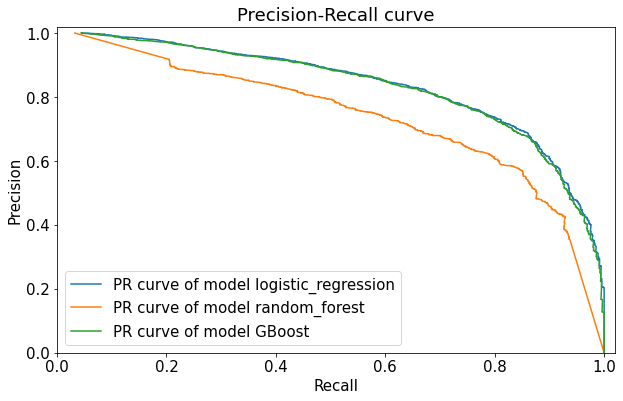

In [ ]:
plt.figure(figsize=(10,6))
for key, PR in precision_recall_models.items():
    plt.plot(PR[0], PR[1],
             label='PR curve of model {}'.format(str(key)))

#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.02])
plt.ylim([0.0, 1.02])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title( 'Precision-Recall curve', fontsize=18)
plt.rc('font', size=15)
plt.show()

In [ ]:
LogReg = best_estimator[0]
RForest = best_estimator[1]
GBoost = best_estimator[2]
final_models = [LogReg, GBoost]

threshold_list = np.arange(0.5, 1.0, 0.05)

for model in final_models:
    print(model)
    for i in threshold_list:
        print('\n***** For threshold = {} *****'.format(i))
        y_test_pred = pd.DataFrame(model.predict_proba(X_test)).applymap(lambda x: 1 if x>i else 0)

        print(classification_report(y_true=y_test, y_pred=y_test_pred.iloc[:,1]))
        print(confusion_matrix(y_test, y_test_pred.iloc[:,1]))
        print()


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

***** For threshold = 0.5 *****
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     61200
           1       0.35      0.93      0.51      2040

    accuracy                           0.94     63240
   macro avg       0.67      0.94      0.74     63240
weighted avg       0.98      0.94      0.95     63240

[[57640  3560]
 [  143  1897]]


***** For threshold = 0.55 *****
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     61200
           1       0.38      0.93      0.54      2040

    accuracy                           0.95     63240
   macro avg       0.69   

# Take Logistic Regression : same prediction results, but running time is much shorter than GB
# Best threshold at 0.9

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     61200
           1       0.57      0.87      0.69      2040

    accuracy                           0.97     63240
   macro avg       0.78      0.92      0.84     63240
weighted avg       0.98      0.97      0.98     63240

[[59850  1350]
 [  273  1767]]


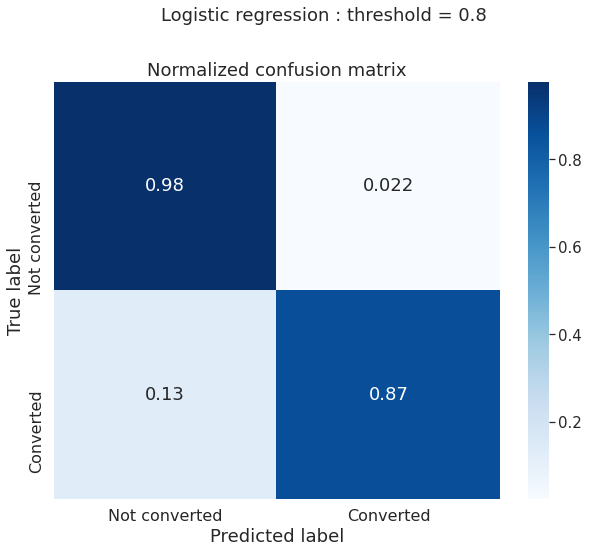

In [ ]:
threshold_taken = 0.8
y_test_pred = pd.DataFrame(LogReg.predict_proba(X_test)).applymap(lambda x: 1 if x> threshold_taken else 0)

print(classification_report(y_true=y_test, y_pred=y_test_pred.iloc[:,1]))
cm = confusion_matrix(y_test, y_test_pred.iloc[:,1])
print(cm)

fig=plt.figure(figsize=(10,8))
'''
plt.subplot(121)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix')
sns.set(font_scale=1.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.set_xticklabels(['Not converted', 'Converted'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.tick_params(labelsize=16)
'''
cm_normalized = confusion_matrix(y_test, y_test_pred.iloc[:,1], normalize='true')

#plt.subplot(122)
ax = sns.heatmap(cm_normalized, annot=True, cmap='Blues')
plt.title('Normalized confusion matrix')
sns.set(font_scale=1.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.set_xticklabels(['Not converted', 'Converted'])
ax.set_yticklabels(['Not converted', 'Converted'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.tick_params(labelsize=16)

plt.subplots_adjust(top=0.85)
fig.suptitle('Logistic regression : threshold = 0.8', fontsize=18)
plt.show()

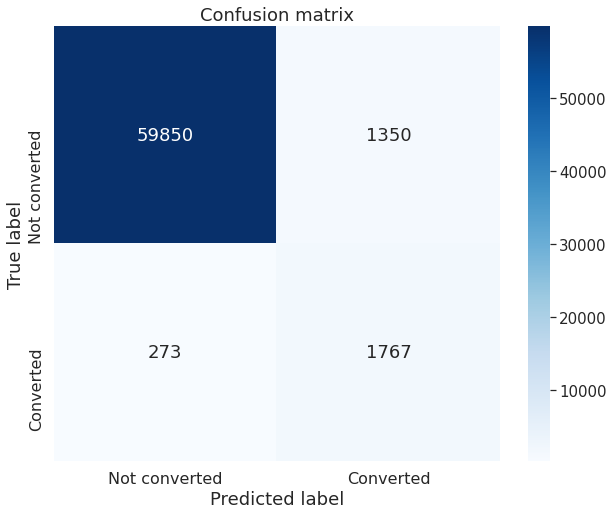

In [ ]:
fig=plt.figure(figsize=(10,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix')
sns.set(font_scale=1.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.set_xticklabels(['Not converted', 'Converted'])
ax.set_yticklabels(['Not converted', 'Converted'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.tick_params(labelsize=16)

#Feature importances

In [ ]:
#X = df[categorical_feats + numeric_feats] 

ohe = (preprocessor.named_transformers_['onehot'])

feature_names_ohe = ohe.get_feature_names(input_features=categorical_feats)
print(feature_names_ohe)
print()
feature_names = np.r_[numeric_feats, feature_names_ohe]
feature_names

['country_China' 'country_Germany' 'country_UK' 'country_US' 'new_user_0'
 'new_user_1' 'source_Ads' 'source_Direct' 'source_Seo']



array(['age', 'total_pages_visited', 'country_China', 'country_Germany',
       'country_UK', 'country_US', 'new_user_0', 'new_user_1',
       'source_Ads', 'source_Direct', 'source_Seo'], dtype=object)

In [ ]:
#Same code to take all features
#feature_name = np.concatenate([feature_names_ohe, numeric_feats])
#feature_name

array(['country_China', 'country_Germany', 'country_UK', 'country_US',
       'new_user_0', 'new_user_1', 'source_Ads', 'source_Direct',
       'source_Seo', 'age', 'total_pages_visited'], dtype=object)

In [ ]:
X_train_preprocessed = pd.DataFrame(data=X_train,columns=feature_names)
X_train_preprocessed.head()


,age,total_pages_visited,country_China,country_Germany,country_UK,country_US,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo
0,-0.189703,2.433556,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,-0.915637,-0.861021,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.189703,-0.262007,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.520582,-0.861021,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.278604,-1.160527,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_features = pd.DataFrame(data=X,columns=feature_names)

X_features.head()

,age,total_pages_visited,country_China,country_Germany,country_UK,country_US,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo
0,25,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_features.describe()

,age,total_pages_visited,country_China,country_Germany,country_UK,country_US,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo
count,316198.000000,316198.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,30.569311,4.872918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.268958,3.341053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,79.000000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X.describe()

,new_user,age,total_pages_visited
count,316200.000000,316200.000000,316200.000000
mean,0.685465,30.569858,4.872966
std,0.464331,8.271802,3.341104
min,0.000000,17.000000,1.000000
25%,0.000000,24.000000,2.000000
50%,1.000000,30.000000,4.000000
75%,1.000000,36.000000,7.000000
max,1.000000,123.000000,29.000000


In [ ]:
X.describe()

,new_user,age,total_pages_visited
count,316200.000000,316200.000000,316200.000000
mean,0.685465,30.569858,4.872966
std,0.464331,8.271802,3.341104
min,0.000000,17.000000,1.000000
25%,0.000000,24.000000,2.000000
50%,1.000000,30.000000,4.000000
75%,1.000000,36.000000,7.000000
max,1.000000,123.000000,29.000000


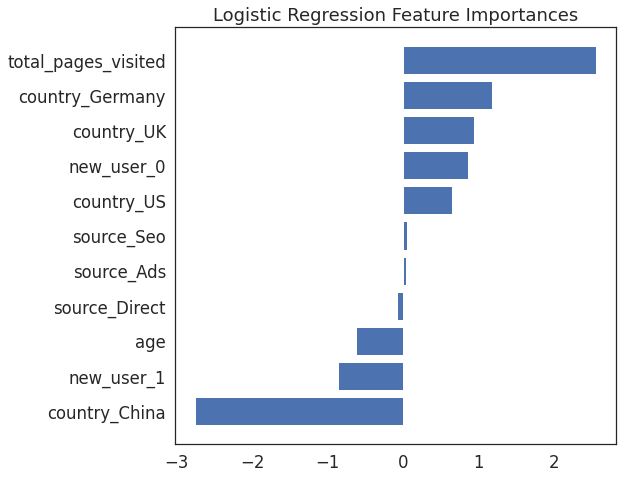

In [ ]:
n = len(feature_names)
LR_feats_importance = LogReg.coef_.ravel()
sorted_idx = np.argsort(LR_feats_importance)[::-1][:n]
feature_names[sorted_idx]

y_ticks = np.arange(0, len(feature_names[sorted_idx]))
fig, ax1 = plt.subplots(1, 1, figsize=(9,7))
ax1.barh(y_ticks, LR_feats_importance[sorted_idx])
ax1.set_yticklabels(feature_names[sorted_idx])
ax1.set_yticks(y_ticks)
ax1.invert_yaxis()

ax1.set_title("Logistic Regression Feature Importances")
fig.tight_layout()
sns.set_style(style='white')
plt.show()


In [ ]:
feats_ranking_LG = pd.DataFrame({'features': feature_names[sorted_idx], 'score': np.abs(LR_feats_importance[sorted_idx]/np.max(abs(LR_feats_importance)))}).sort_values(by='score', ascending=False)
feats_ranking_LG

,features,score
10,country_China,1.000000
0,total_pages_visited,0.928744
1,country_Germany,0.425043
2,country_UK,0.340041
9,new_user_1,0.313671
3,new_user_0,0.313047
4,country_US,0.234291
8,age,0.226058
7,source_Direct,0.032406
5,source_Seo,0.017643


Text(-117.06000000000002, 0.5, '')

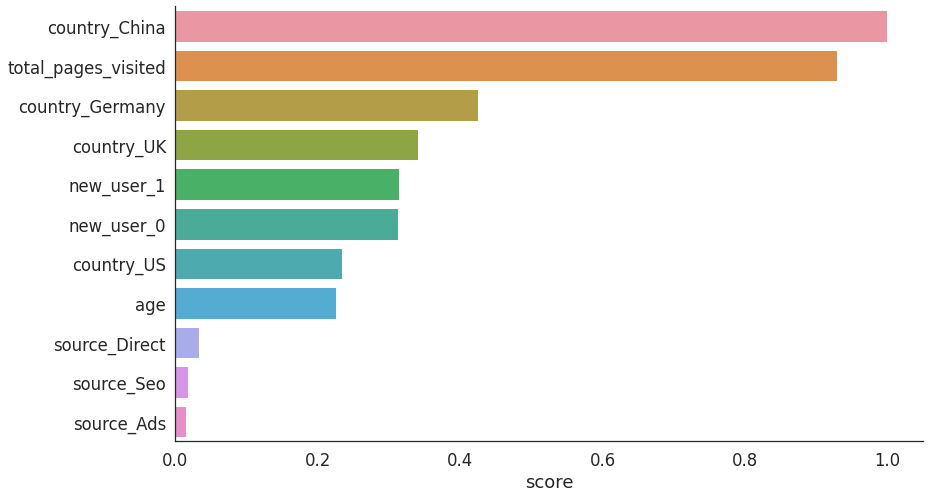

In [ ]:
sns.set_style(style='white')
sns.catplot(x='score', y='features', data=feats_ranking_LG, kind="bar", height=7.27, aspect=11.7/6.27)
plt.ylabel('')


#Interpretion coef. of linear model 
https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py

Standard deviations of different features

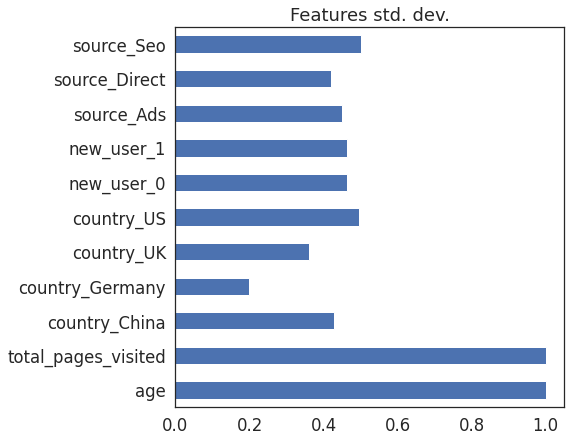

In [ ]:
X_train_preprocessed = pd.DataFrame(data=X_train,columns=feature_names)
#X_train_preprocessed.head()

X_train_preprocessed.std(axis=0).plot(kind='barh', figsize=(9, 7))
plt.title('Features std. dev.')
plt.subplots_adjust(left=.3)

Multiplying the coefficients by the standard deviation of the related feature would reduce all the coefficients to the same unit of measure. As we will see after this is equivalent to normalize numerical variables to their standard deviation, as  y = \sum{coef_i \times X_i} =
\sum{(coef_i \times std_i) \times (X_i / std_i)}.

In that way, we emphasize that the greater the variance of a feature, the larger the weight of the corresponding coefficient on the output, all else being equal.

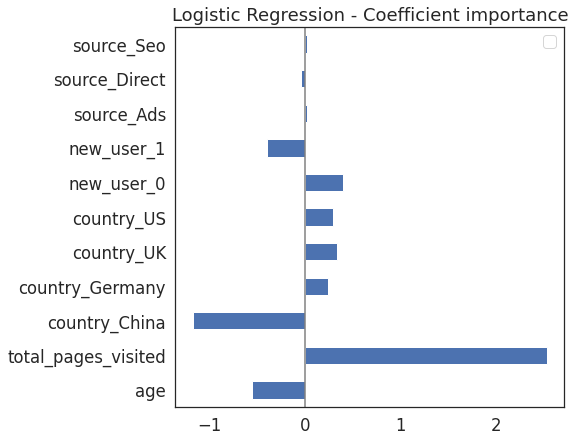

In [ ]:
coefs = pd.DataFrame(LogReg.coef_.ravel() *X_train_preprocessed.std(axis=0),
                     columns=['Coefficient_importance'], index=feature_names)
coefs
coefs.plot(kind='barh', figsize=(9, 7))
plt.legend('')
plt.title('Logistic Regression - Coefficient importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

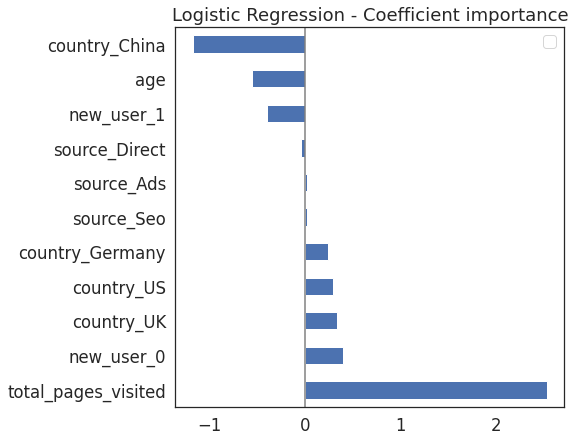

In [ ]:
coefs.sort_values(by='Coefficient_importance', ascending=False).plot(kind='barh', figsize=(9, 7))
plt.legend('')
plt.title('Logistic Regression - Coefficient importance')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Text(-117.06, 0.5, '')

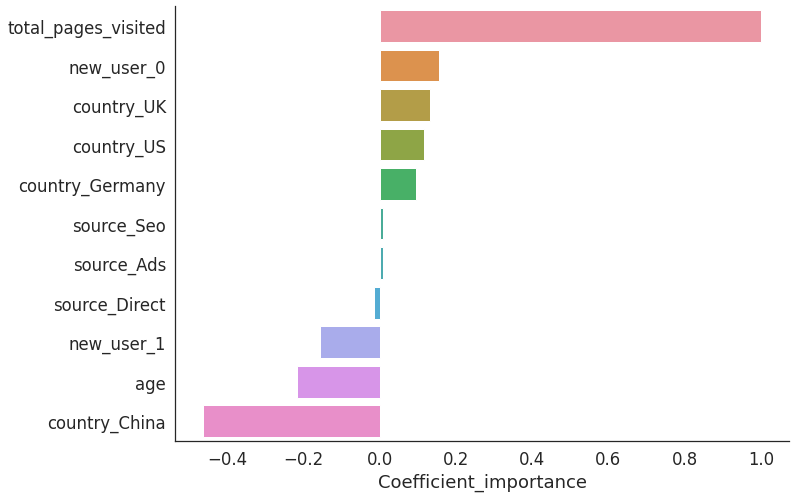

In [ ]:
coefs_norm = (pd.DataFrame({
    'features': feature_names,
    'Coefficient_importance': (LogReg.coef_.ravel() *X_train_preprocessed.std(axis=0)/np.max(LogReg.coef_.ravel() *X_train_preprocessed.std(axis=0)))})
.sort_values(by='Coefficient_importance', ascending=False))

sns.set_style(style='white')
sns.catplot(x='Coefficient_importance', y='features', data=coefs_norm, kind="bar", height=7.27, aspect=11.7/7.27)
plt.ylabel('')

Text(-117.06, 0.5, '')

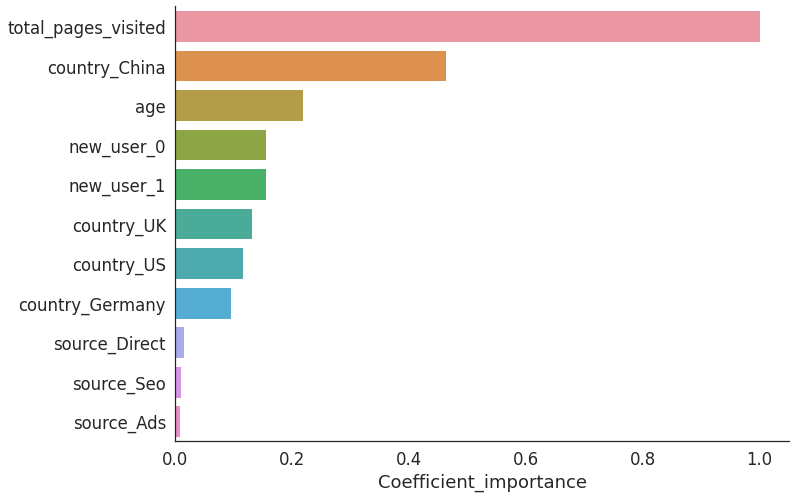

In [ ]:
coefs_norm_abs = (pd.DataFrame({
    'features': feature_names,
    'Coefficient_importance': np.abs((LogReg.coef_.ravel() *X_train_preprocessed.std(axis=0)/np.max(LogReg.coef_.ravel() *X_train_preprocessed.std(axis=0))))})
.sort_values(by='Coefficient_importance', ascending=False))

sns.set_style(style='white')
sns.catplot(x='Coefficient_importance', y='features', data=coefs_norm_abs, kind="bar", height=7.27, aspect=11.7/7.27)
plt.ylabel('')

Checking the variability of the coefficients

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import TransformedTargetRegressor

cv_model = cross_validate(
    LogReg, X_test, y_test, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1)


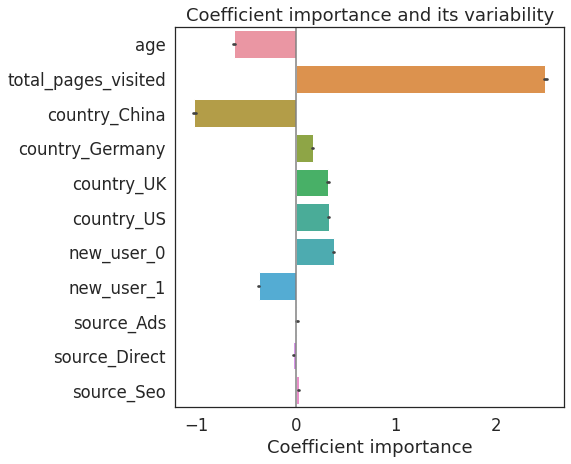

In [ ]:
coefs_cv = pd.DataFrame(
    [est.coef_.ravel() * X_train.std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names)
#coefs_cv

plt.figure(figsize=(9, 7))
sns.barplot(data=coefs_cv, orient='h')
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

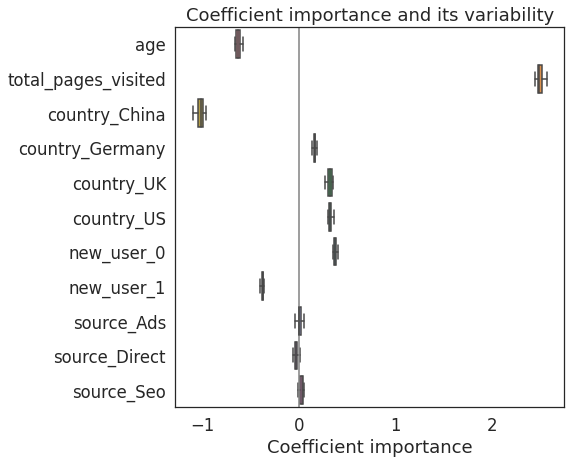

In [ ]:
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs_cv, orient='h')
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

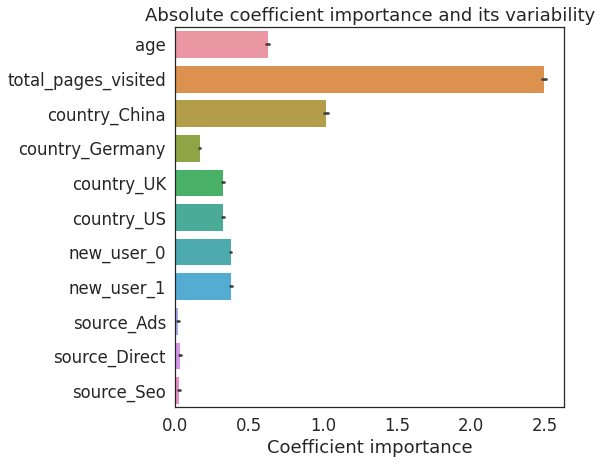

In [ ]:
coefs_cv_abs = pd.DataFrame(
    [np.abs(est.coef_.ravel() * X_train.std(axis=0))
     for est in cv_model['estimator']],
    columns=feature_names)

plt.figure(figsize=(9, 7))
sns.barplot(data=coefs_cv_abs, orient='h')
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Absolute coefficient importance and its variability')
plt.subplots_adjust(left=.3)

Text(-117.06, 0.5, '')

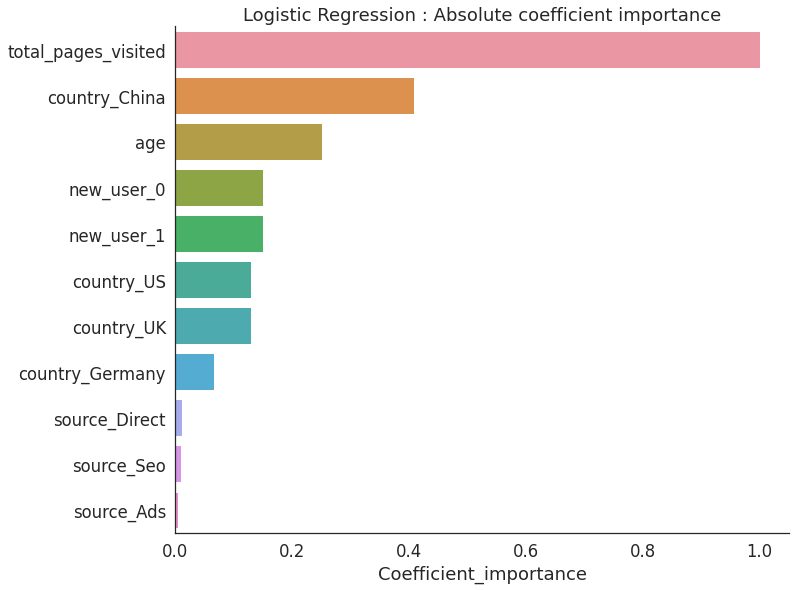

In [ ]:
coefs_cv_mean = (pd.DataFrame({'features': feature_names, 
                               'Coefficient_importance': np.abs(coefs_cv.mean())/np.max(np.abs(coefs_cv.mean()))})
                  .sort_values(by='Coefficient_importance', ascending=False))

coefs_cv_mean

sns.catplot(x='Coefficient_importance', y='features', data=coefs_cv_mean, kind="bar", height=8.27, aspect=11.7/8.27)
plt.title('Logistic Regression : Absolute coefficient importance')
plt.ylabel('')

GBoost : feature importances

In [ ]:
GB_feats_importance = GBoost.feature_importances_
sorted_GB = np.argsort(GB_feats_importance)[::-1][:n]

feats_ranking_GB = pd.DataFrame({'features': feature_names[sorted_GB], 'score': np.abs(GB_feats_importance[sorted_GB])}).sort_values(by='score', ascending=False)
feats_ranking_GB

,features,score
0,total_pages_visited,0.939337
1,country_China,0.026730
2,new_user_0,0.016758
3,new_user_1,0.009444
4,age,0.006613
5,country_Germany,0.000333
6,country_US,0.000329
7,source_Ads,0.000144
8,source_Direct,0.000138
9,country_UK,0.000110


Text(-117.06, 0.5, '')

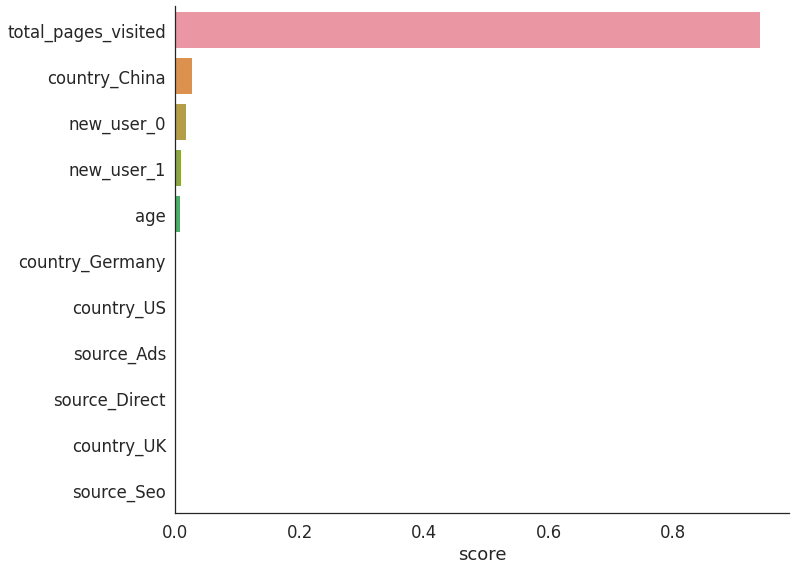

In [ ]:
sns.catplot(x='score', y='features', data=feats_ranking_GB, kind="bar", height=8.27, aspect=11.7/8.27)
plt.ylabel('')

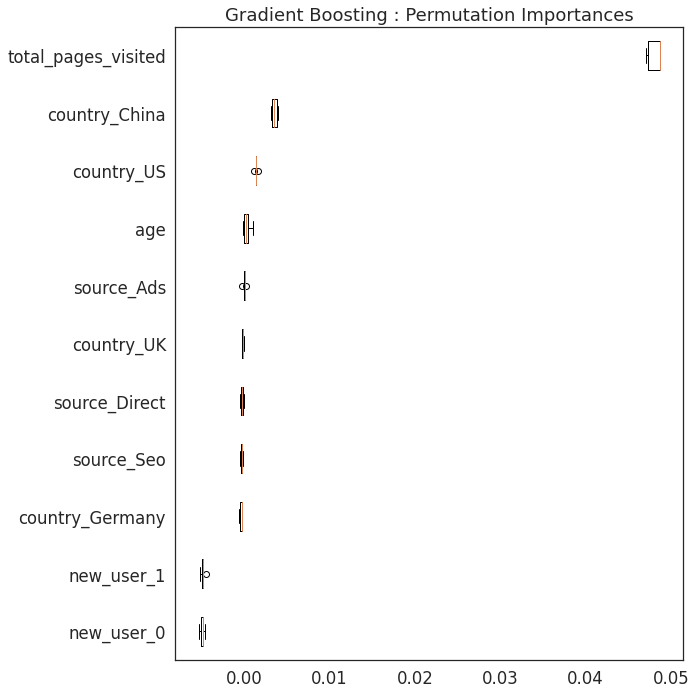

In [ ]:
permut_GB = permutation_importance(GBoost, X_test, y_test, n_repeats=5,
                                random_state=42, n_jobs=2)
sorted_GB = permut_GB.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(permut_GB.importances[sorted_GB].T,
           vert=False, labels=feature_names[sorted_GB])
ax.set_title("Gradient Boosting : Permutation Importances")
fig.tight_layout()
sns.set_style(style='white')
plt.show()

Random Forest : Feature importances

In [ ]:
RF_feats_importance = RForest.feature_importances_
sorted_RF = np.argsort(RF_feats_importance)[::-1][:n]

feats_ranking_RF = pd.DataFrame({'features': feature_names[sorted_RF], 'score': np.abs(GB_feats_importance[sorted_RF])}).sort_values(by='score', ascending=False)
feats_ranking_RF

,features,score
0,total_pages_visited,0.939337
4,country_China,0.026730
3,new_user_0,0.016758
2,new_user_1,0.009444
1,age,0.006613
7,country_Germany,0.000333
6,country_US,0.000329
10,source_Ads,0.000144
9,source_Direct,0.000138
5,country_UK,0.000110


In [ ]:
'''
RF_feats_importance = RForest.feature_importances_
sorted_RF = np.argsort(RF_feats_importance)[::-1][:n]

feats_ranking_RF = pd.DataFrame({'features': feature_names[sorted_RF], 'score': (RF_feats_importance[sorted_RF])}).sort_values(by='score', ascending=False)
feats_ranking_RF
'''

Text(0.5, 1.0, 'Random Forest - Feature importances')

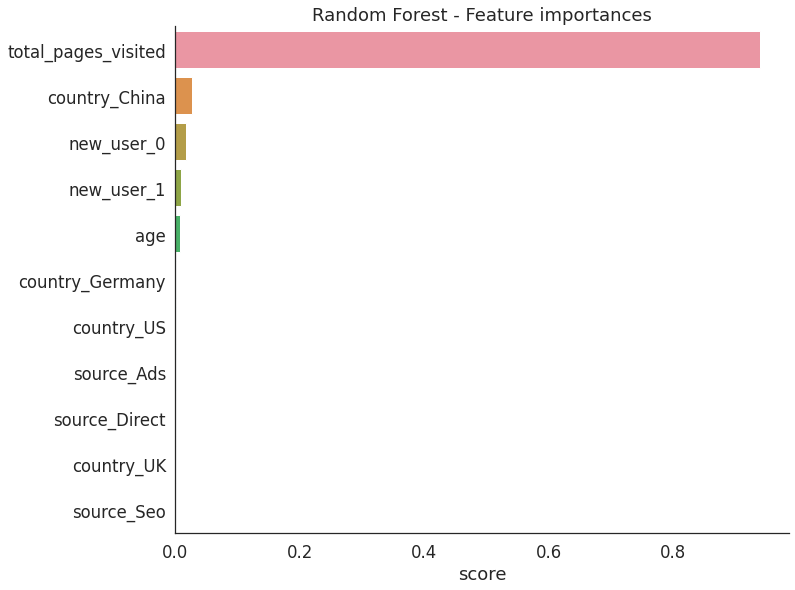

In [ ]:
sns.catplot(x='score', y='features', data=feats_ranking_RF, kind="bar", height=8.27, aspect=11.7/8.27)
plt.ylabel('')
plt.title('Random Forest - Feature importances')

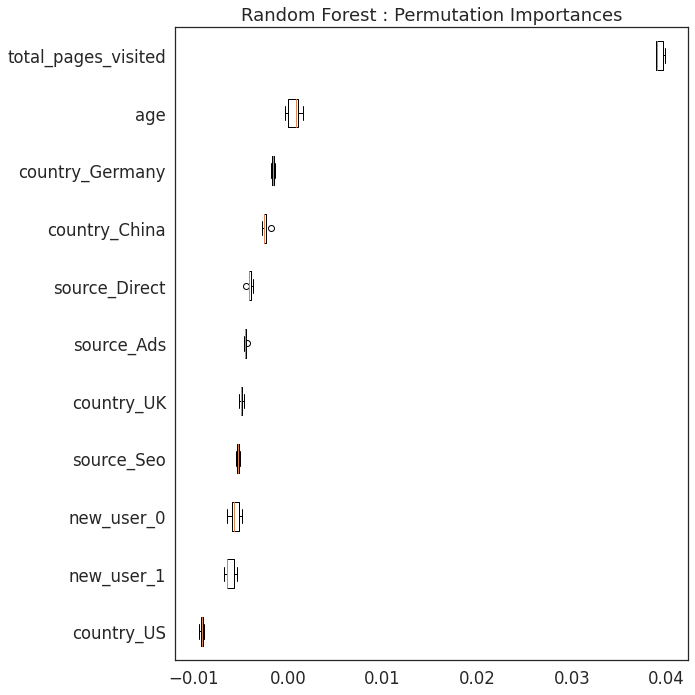

In [ ]:
permut_RF = permutation_importance(RForest, X_test, y_test, n_repeats=5,
                                random_state=42, n_jobs=2)
sorted_RF = permut_RF.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(permut_RF.importances[sorted_RF].T,
           vert=False, labels=feature_names[sorted_RF])
ax.set_title("Random Forest : Permutation Importances")
fig.tight_layout()
plt.show()

#Test statistique sur l'importance des features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X_indices = np.arange(X_train.shape[-1])

selector = SelectKBest(f_classif, k=11)
selector.fit(X_train, y_train)

df_stat_feats = pd.DataFrame({'features':feature_names, 'score': selector.scores_/max(selector.scores_), 'p_value': selector.pvalues_}).sort_values(by='score', ascending=False)
df_stat_feats

,features,score,p_value
1,country_Germany,1.000000,0.000000e+00
7,source_Direct,0.061923,0.000000e+00
6,source_Ads,0.061923,0.000000e+00
2,country_UK,0.025532,0.000000e+00
0,country_China,0.020187,0.000000e+00
4,new_user_0,0.005999,5.944053e-130
5,new_user_1,0.003385,3.324896e-74
3,country_US,0.003309,1.404273e-72
9,age,0.000418,1.482438e-10
8,source_Seo,0.000160,7.419984e-05


Text(-117.06, 0.5, '')

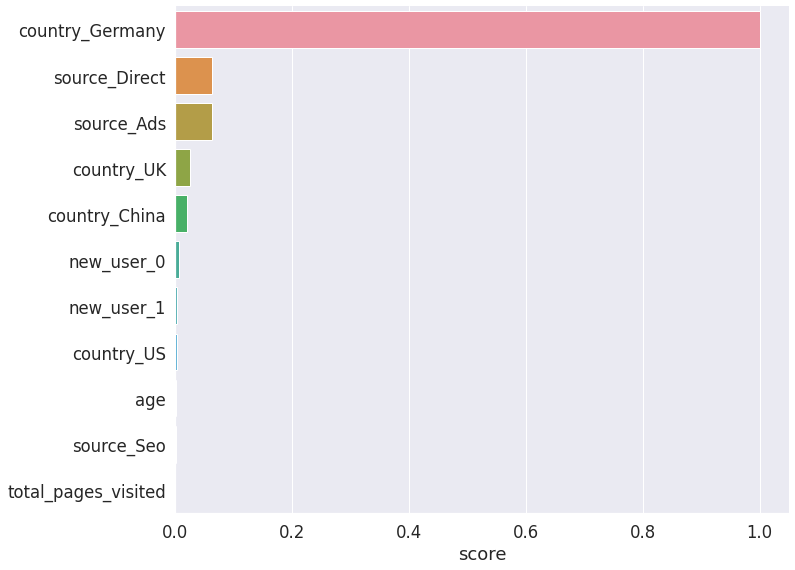

In [ ]:
sns.catplot(x='score', y='features', data=df_stat_feats, kind="bar", height=8.27, aspect=11.7/8.27)
plt.ylabel('')